### Melting

In [1]:
import pandas as pd
df = pd.DataFrame([['CityA', 'Predict', 30, 45,24], ['CityB','Actual',32,43,22]],
                  columns=['location', 'Temperature',  'Jan-2010',  'Feb-2010',  'Mar-2010'])

location Temperature  Jan-2010  Feb-2010  Mar-2010
0    CityA     Predict        30        45        24
1    CityB      Actual        32        43        22

In [2]:
melted = df.melt(id_vars=["location",  "Temperature"], var_name="Date", value_name="Value")

location Temperature      Date  Value
0    CityA     Predict  Jan-2010     30
1    CityB      Actual  Jan-2010     32
2    CityA     Predict  Feb-2010     45
3    CityB      Actual  Feb-2010     43
4    CityA     Predict  Mar-2010     24
5    CityB      Actual  Mar-2010     22

### Pivoting

In [6]:
pivoted = melted.pivot(index=['location','Temperature'],columns='Date',values='Value').reset_index()

Date location Temperature  Feb-2010  Jan-2010  Mar-2010
0       CityA     Predict        45        30        24
1       CityB      Actual        43        32        22

In [7]:
new_idx = pivoted.set_index(['location','Temperature'])

Date                  Feb-2010  Jan-2010  Mar-2010
location Temperature                              
CityA    Predict            45        30        24
CityB    Actual             43        32        22

In [17]:
stacked = new_idx.stack() # .to_frame()

location  Temperature  Date    
CityA     Predict      Feb-2010    45
                       Jan-2010    30
                       Mar-2010    24
CityB     Actual       Feb-2010    43
                       Jan-2010    32
                       Mar-2010    22
dtype: int64

In [21]:
stacked.loc['CityA']

Temperature  Date    
Predict      Feb-2010    45
             Jan-2010    30
             Mar-2010    24
dtype: int64

In [22]:
stacked.loc[('CityA','Predict')]

Date
Feb-2010    45
Jan-2010    30
Mar-2010    24
dtype: int64

In [18]:
stacked.unstack()

Date                  Feb-2010  Jan-2010  Mar-2010
location Temperature                              
CityA    Predict            45        30        24
CityB    Actual             43        32        22

In [19]:
unstacked = new_idx.unstack()

Date        Feb-2010         Jan-2010         Mar-2010        
Temperature   Actual Predict   Actual Predict   Actual Predict
location                                                      
CityA            NaN    45.0      NaN    30.0      NaN    24.0
CityB           43.0     NaN     32.0     NaN     22.0     NaN

In [12]:
unstacked['Feb-2010']['Actual']

location
CityA     NaN
CityB    43.0
Name: Actual, dtype: float64

In [13]:
unstacked[('Feb-2010', 'Actual')]

location
CityA     NaN
CityB    43.0
Name: (Feb-2010, Actual), dtype: float64

In [26]:
unstacked.loc['CityA', ('Feb-2010', 'Predict')] = 89.0

In [27]:
new_idx

Date                  Feb-2010  Jan-2010  Mar-2010
location Temperature                              
CityA    Predict            45        30        24
CityB    Actual             43        32        22

In [ ]:
pivoted.stack()

### String methods

In [28]:
import pandas as pd
df = pd.read_csv('penguins_lter.csv')

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [29]:
df.Island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [30]:
df.Island.str.replace('o','u').str[:3]

0      Tur
1      Tur
2      Tur
3      Tur
4      Tur
      ... 
339    Bis
340    Bis
341    Bis
342    Bis
343    Bis
Name: Island, Length: 344, dtype: object

In [ ]:
df.loc[1,'Island']

In [ ]:
df.iloc[1,2]

In [32]:
df.Island.str.strip()

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: Island, Length: 344, dtype: object

In [31]:
df['Culmen Length (mm)'].str[:3]

AttributeError: Can only use .str accessor with string values!

In [33]:
time_s = pd.Series(pd.to_datetime(['Jan 01, 2021 09:32:14.645', "2022-02-02"]))

ValueError: time data "2022-02-02" doesn't match format "%b %d, %Y %H:%M:%S.%f", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [34]:
time_s = pd.Series(pd.to_datetime(['Jan 01, 2021 09:32:14.645', "2022-02-02"], format='mixed'))

0   2021-01-01 09:32:14.645
1   2022-02-02 00:00:00.000
dtype: datetime64[ns]

In [38]:
time_s.dt.hour

0    9
1    0
dtype: int32

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [41]:
df['Date Egg'].str[:2]

0      11
1      11
2      11
3      11
4      11
       ..
339    12
340    11
341    11
342    11
343    11
Name: Date Egg, Length: 344, dtype: object

In [43]:
"12/1/09" < "2008-11-11"

True

In [42]:
df[df['Date Egg'] < "2008-11-11"]

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [44]:
df['eggDT'] = pd.to_datetime(df['Date Egg'], format='%m/%d/%y')

In [45]:
df

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments      eggDT  
0    Not enough blood for isotopes. 2007-11-11  
1                               NaN 2007-11-11  
2                               NaN 2007-11-16  
3                Adult not sampled. 2007-11-16  
4                               NaN 2007-11-16  
..                              ...        ...  
339                             NaN 2009-12-01  
340                             NaN 2009-11-22  
341                             NaN 2009-11-22  
342   

In [46]:
df = pd.read_csv('penguins_lter.csv', parse_dates=["Date Egg"])

/var/folders/9w/_230jf8901jg8qdm81czt46c0000gn/T/ipykernel_9633/2541396288.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('penguins_lter.csv', parse_dates=["Date Egg"])


studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion   Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes 2007-11-11   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes 2007-11-11   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes 2007-11-16   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes 2007-11-16   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes 2007-11-16   
..         ...                 ...           ...               ...        ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No 2009-12-01   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes 2009-11-22   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes 2009-11-22   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes 2009-11-22   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes 2009-11-22   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [47]:
df[df["Date Egg"] < "2008-11-11"]

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
295   PAL0809             76    Gentoo penguin (Pygoscelis papua)  Anvers   
296   PAL0809             77    Gentoo penguin (Pygoscelis papua)  Anvers   
297   PAL0809             78    Gentoo penguin (Pygoscelis papua)  Anvers   
298   PAL0809             79    Gentoo penguin (Pygoscelis papua)  Anvers   
299   PAL0809             80    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion   Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes 2007-11-11   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes 2007-11-11   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes 2007-11-16   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes 2007-11-16   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes 2007-11-16   
..         ...                 ...           ...               ...        ...   
295     Biscoe  Adult, 1 Egg Stage         N56A2               Yes 2008-11-06   
296     Biscoe  Adult, 1 Egg Stage         N58A1               Yes 2008-11-06   
297     Biscoe  Adult, 1 Egg Stage         N58A2               Yes 2008-11-06   
298     Biscoe  Adult, 1 Egg Stage         N60A1               Yes 2008-11-09   
299     Biscoe  Adult, 1 Egg Stage         N60A2               Yes 2008-11-09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
295                48.6               16.0                230.0   
296                47.5               14.2                209.0   
297                51.1               16.3                220.0   
298                45.2               13.8                215.0   
299                45.2               16.4                223.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
295         5800.0    MALE            8.59640          -26.71199   
296         4600.0  FEMALE            8.39299          -26.78733   
297         6000.0    MALE            8.40327          -26.76821   
298         4750.0  FEMALE            8.24694          -26.65359   
299         5950.0    MALE            8.19749          -26.65931   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
295                             NaN  
296                             NaN  
297                             NaN  
298                             NaN  
299                             NaN  

[178 rows x 17 columns]

In [48]:
df[df["Date Egg"] < "Nov 11, 2008"]

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
295   PAL0809             76    Gentoo penguin (Pygoscelis papua)  Anvers   
296   PAL0809             77    Gentoo penguin (Pygoscelis papua)  Anvers   
297   PAL0809             78    Gentoo penguin (Pygoscelis papua)  Anvers   
298   PAL0809             79    Gentoo penguin (Pygoscelis papua)  Anvers   
299   PAL0809             80    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion   Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes 2007-11-11   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes 2007-11-11   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes 2007-11-16   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes 2007-11-16   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes 2007-11-16   
..         ...                 ...           ...               ...        ...   
295     Biscoe  Adult, 1 Egg Stage         N56A2               Yes 2008-11-06   
296     Biscoe  Adult, 1 Egg Stage         N58A1               Yes 2008-11-06   
297     Biscoe  Adult, 1 Egg Stage         N58A2               Yes 2008-11-06   
298     Biscoe  Adult, 1 Egg Stage         N60A1               Yes 2008-11-09   
299     Biscoe  Adult, 1 Egg Stage         N60A2               Yes 2008-11-09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
295                48.6               16.0                230.0   
296                47.5               14.2                209.0   
297                51.1               16.3                220.0   
298                45.2               13.8                215.0   
299                45.2               16.4                223.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
295         5800.0    MALE            8.59640          -26.71199   
296         4600.0  FEMALE            8.39299          -26.78733   
297         6000.0    MALE            8.40327          -26.76821   
298         4750.0  FEMALE            8.24694          -26.65359   
299         5950.0    MALE            8.19749          -26.65931   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
295                             NaN  
296                             NaN  
297                             NaN  
298                             NaN  
299                             NaN  

[178 rows x 17 columns]

In [49]:
df['eggMonth'] = df["Date Egg"].dt.to_period('M')

In [50]:
df

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion   Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes 2007-11-11   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes 2007-11-11   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes 2007-11-16   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes 2007-11-16   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes 2007-11-16   
..         ...                 ...           ...               ...        ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No 2009-12-01   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes 2009-11-22   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes 2009-11-22   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes 2009-11-22   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes 2009-11-22   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments eggMonth  
0    Not enough blood for isotopes.  2007-11  
1                               NaN  2007-11  
2                               NaN  2007-11  
3                Adult not sampled.  2007-11  
4                               NaN  2007-11  
..                              ...      ...  
339                             NaN  2009-12  
340                             NaN  2009-11  
341                             NaN  2009-11  
342           

In [51]:
df.groupby('eggMonth').size()

eggMonth
2007-11    104
2007-12      6
2008-11    114
2009-11    112
2009-12      8
Freq: M, dtype: int64

## matplotlib Visualization

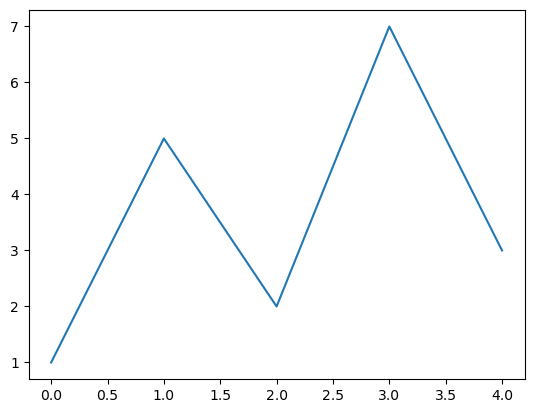

In [52]:
import matplotlib.pyplot as plt
plt.plot([1,5,2,7,3]) # just y values

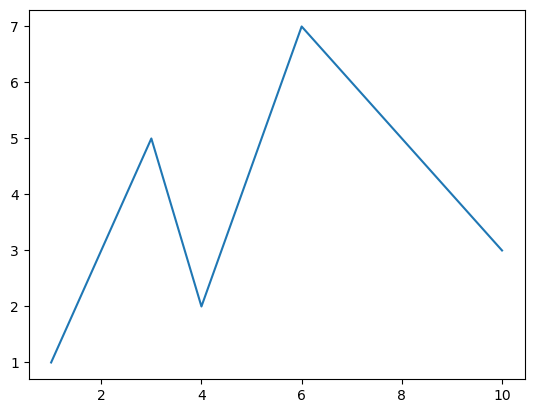

In [53]:
plt.plot([1,3,4,6,10],[1,5,2,7,3]) # x and y values

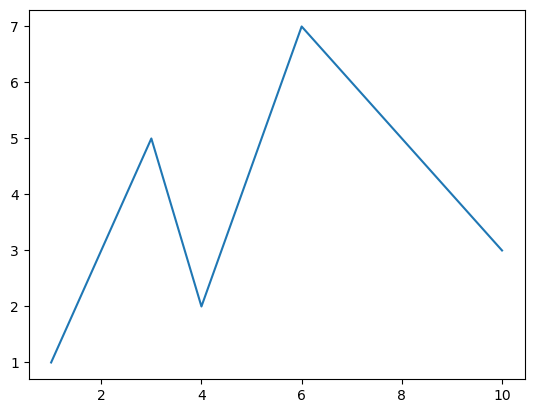

In [54]:
import numpy as np
plt.plot(np.array([1,3,4,6,10]),np.array([1,5,2,7,3])) # x and y values

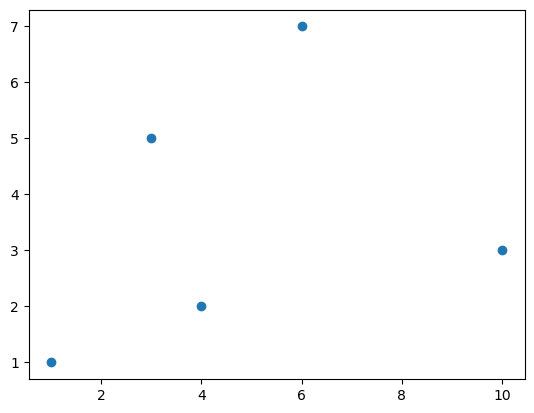

In [55]:
plt.scatter([1,3,4,6,10],[1,5,2,7,3]) # different version

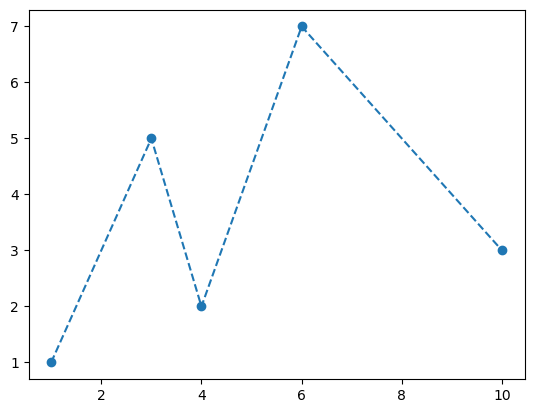

In [56]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], 'o--') # add format string

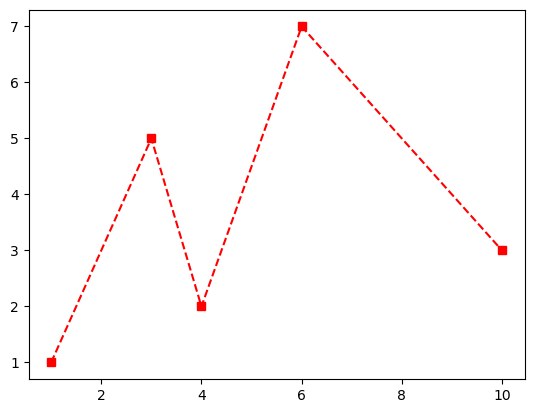

In [57]:
# red color
# square marker
# dashed line
plt.plot([1,3,4,6,10],[1,5,2,7,3],'rs--')

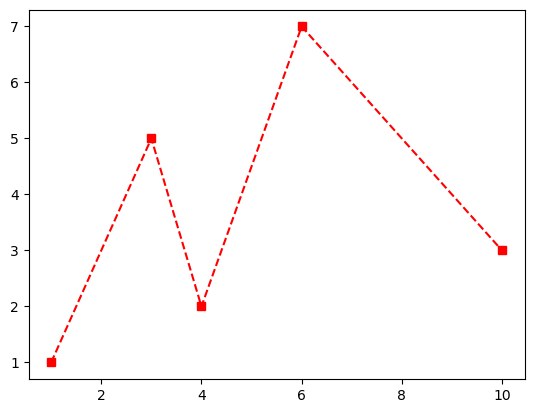

In [58]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], color='red', marker='s', linestyle='dashed')

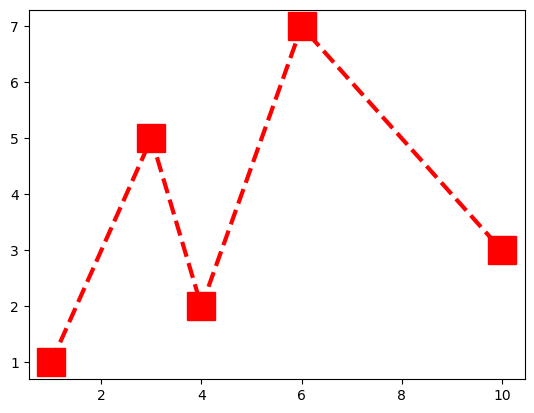

In [61]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], 
         color='red', marker='s', linestyle='dashed',
         linewidth=3, markersize=20)

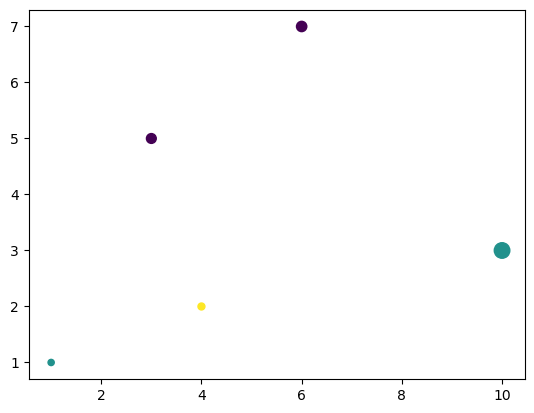

In [62]:
data = {'age': [1,3,4,6,10],
        'num_jumps': [1,5,2,7,3],
        'weight': [20,50,25,55,125],
        'num_scoops': [3,2,4,2,3]}
plt.scatter(x='age',y='num_jumps', c='num_scoops', s='weight', data=data) #,c='num_scoops',s='weight',data=data)